# **Stock Price Prediction and Analysis using different Regression models**

In [663]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, matthews_corrcoef
from datetime import datetime, timedelta
import re

%matplotlib inline

In [664]:
filename = "隆基绿能_601012_成长.xlsx"
code = re.search('[0-9]+', filename).group()
code

'601012'

In [665]:
df_stockprice = pd.read_excel('预测结果_股价.xlsx', sheet_name=code+'.SH', engine="openpyxl")
df_stockprice.rename(columns={'Unnamed: 0' : 'Date'}, inplace=True)
df_stockprice.set_index('Date', inplace=True)
df_stockprice = df_stockprice[['实际值']]
df_stockprice

,实际值
Date,
2022-01-04,84.86
2022-01-05,81.47
2022-01-06,80.55
2022-01-07,80.27
2022-01-10,79.70
...,...
2022-11-28,44.59
2022-11-29,44.96
2022-11-30,45.78


In [666]:
# Reading the Excel file
df = pd.read_excel('data_new5_withdiff_withlag/' + filename, engine="openpyxl")
df.rename(columns={'Unnamed: 0' : 'Date'}, inplace=True)
df.set_index('Date', inplace=True)
df.tail()

,收益率,ret_lag1,ret_lag2,ret_lag3,ret_lag4,ret_lag5,ret_lag6,ret_lag7,前收盘价(元)_diff1,开盘价(元)_diff1,...,宏观_PPI_diff1,宏观_出口价格指数(总),宏观_出口价格指数(车船航),宏观_进口价格指数(总)_diff1,宏观_进口价格指数(车船航),宏观_固定资产投资完成额,宏观_社会消费品零售总额_diff1,宏观_M2_diff2,宏观_金融机构各项贷款余额_diff1,宏观_社会融资规模_diff1
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-25,-0.024929,-0.030117,-0.009246,0.022122,-0.024921,0.015957,0.011405,-0.003859,-0.638348,-1.076076,...,-0.051989,3.745188,3.277315,-0.028079,-0.767136,0.223407,-0.149665,0.0,0.031278,0.018098
2022-11-28,0.008298,-0.024929,-0.030117,-0.009246,0.022122,-0.024921,0.015957,0.011405,-1.871851,-3.418517,...,-0.051989,3.745188,3.277315,-0.028079,-0.767136,0.223407,-0.149665,0.0,0.031278,0.018098
2022-11-29,0.018238,0.008298,-0.024929,-0.030117,-0.009246,0.022122,-0.024921,0.015957,-1.519422,0.267745,...,-0.051989,3.745188,3.277315,-0.028079,-0.767136,0.223407,-0.149665,0.0,0.031278,0.018098
2022-11-30,0.026868,0.018238,0.008298,-0.024929,-0.030117,-0.009246,0.022122,-0.024921,0.381179,0.366374,...,-0.051989,3.745188,3.277315,-0.028079,-0.767136,0.223407,-0.149665,0.0,0.031278,0.018098
2022-12-01,0.020634,0.026868,0.018238,0.008298,-0.024929,-0.030117,-0.009246,0.022122,0.947583,1.821153,...,-0.051989,3.745188,3.277315,-0.028079,-0.767136,0.223407,-0.149665,0.0,0.031278,0.018098


In [667]:
# df = df.diff()

In [668]:
# df = df.drop([df.index[0]], axis=0)

In [669]:
df.head()

,收益率,ret_lag1,ret_lag2,ret_lag3,ret_lag4,ret_lag5,ret_lag6,ret_lag7,前收盘价(元)_diff1,开盘价(元)_diff1,...,宏观_PPI_diff1,宏观_出口价格指数(总),宏观_出口价格指数(车船航),宏观_进口价格指数(总)_diff1,宏观_进口价格指数(车船航),宏观_固定资产投资完成额,宏观_社会消费品零售总额_diff1,宏观_M2_diff2,宏观_金融机构各项贷款余额_diff1,宏观_社会融资规模_diff1
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-22,0.039485,-0.020185,-0.047276,-0.034056,0.031125,0.027049,0.004942,0.052905,-0.827150,-0.447316,...,-0.051989,-2.162753,-0.746224,-0.028079,-0.53487,-0.820241,-0.149665,0.0,0.031278,0.018098
2016-01-25,-0.078448,0.039485,-0.020185,-0.047276,-0.034056,0.031125,0.027049,0.004942,-0.386613,-0.114443,...,-0.051989,-2.162753,-0.746224,-0.028079,-0.53487,-0.820241,-0.149665,0.0,0.031278,0.018098
2016-01-26,-0.080645,-0.078448,0.039485,-0.020185,-0.047276,-0.034056,0.031125,0.027049,0.494460,0.181445,...,-0.051989,-2.162753,-0.746224,-0.028079,-0.53487,-0.820241,-0.149665,0.0,0.031278,0.018098
2016-01-27,-0.030214,-0.080645,-0.078448,0.039485,-0.020185,-0.047276,-0.034056,0.031125,-1.280273,-1.297992,...,-0.051989,-2.162753,-0.746224,-0.028079,-0.53487,-0.820241,-0.149665,0.0,0.031278,0.018098
2016-01-28,0.046231,-0.030214,-0.080645,-0.078448,0.039485,-0.020185,-0.047276,-0.034056,-1.217339,-1.273334,...,-0.051989,-2.162753,-0.746224,-0.028079,-0.53487,-0.820241,-0.149665,0.0,0.031278,0.018098


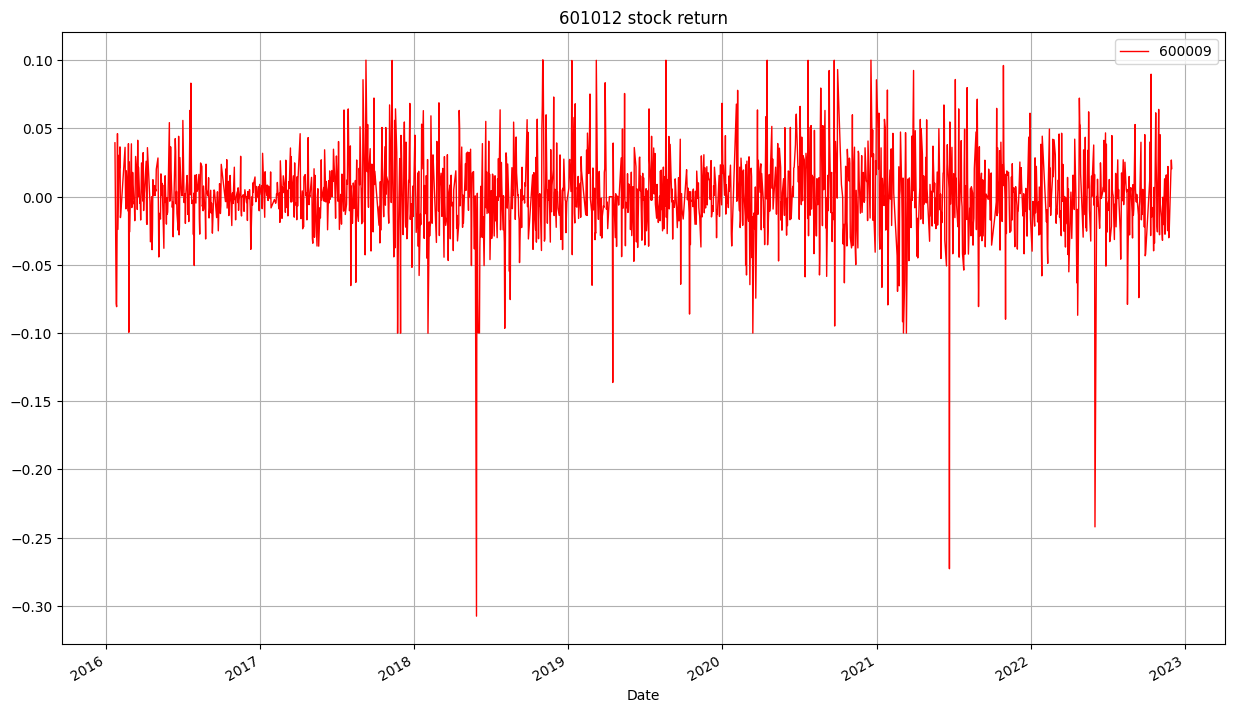

In [670]:
# Visualizing the stock prices

df['收益率'].plot(label='600009', figsize=(15, 9), title=f'{code} stock return', color='red', linewidth=1.0, grid=True)
plt.legend()

In [671]:
df_X = df.drop(['收益率'], axis = 1)
df_X.head()

,ret_lag1,ret_lag2,ret_lag3,ret_lag4,ret_lag5,ret_lag6,ret_lag7,前收盘价(元)_diff1,开盘价(元)_diff1,最高价(元)_diff1,...,宏观_PPI_diff1,宏观_出口价格指数(总),宏观_出口价格指数(车船航),宏观_进口价格指数(总)_diff1,宏观_进口价格指数(车船航),宏观_固定资产投资完成额,宏观_社会消费品零售总额_diff1,宏观_M2_diff2,宏观_金融机构各项贷款余额_diff1,宏观_社会融资规模_diff1
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-22,-0.020185,-0.047276,-0.034056,0.031125,0.027049,0.004942,0.052905,-0.827150,-0.447316,-0.791814,...,-0.051989,-2.162753,-0.746224,-0.028079,-0.53487,-0.820241,-0.149665,0.0,0.031278,0.018098
2016-01-25,0.039485,-0.020185,-0.047276,-0.034056,0.031125,0.027049,0.004942,-0.386613,-0.114443,0.115661,...,-0.051989,-2.162753,-0.746224,-0.028079,-0.53487,-0.820241,-0.149665,0.0,0.031278,0.018098
2016-01-26,-0.078448,0.039485,-0.020185,-0.047276,-0.034056,0.031125,0.027049,0.494460,0.181445,-0.205446,...,-0.051989,-2.162753,-0.746224,-0.028079,-0.53487,-0.820241,-0.149665,0.0,0.031278,0.018098
2016-01-27,-0.080645,-0.078448,0.039485,-0.020185,-0.047276,-0.034056,0.031125,-1.280273,-1.297992,-1.461948,...,-0.051989,-2.162753,-0.746224,-0.028079,-0.53487,-0.820241,-0.149665,0.0,0.031278,0.018098
2016-01-28,-0.030214,-0.080645,-0.078448,0.039485,-0.020185,-0.047276,-0.034056,-1.217339,-1.273334,-1.266492,...,-0.051989,-2.162753,-0.746224,-0.028079,-0.53487,-0.820241,-0.149665,0.0,0.031278,0.018098


In [672]:
df_Y = df['收益率']
df_Y.head()

Date
2016-01-22    0.039485
2016-01-25   -0.078448
2016-01-26   -0.080645
2016-01-27   -0.030214
2016-01-28    0.046231
Name: 收益率, dtype: float64

In [673]:
X_train = np.array(df_X[df_X.index < datetime(2021, 1, 1)])
X_val = np.array(df_X[(df_X.index >= datetime(2021, 1, 1)) & (df_X.index < datetime(2022, 1, 1))])
X_test = np.array(df_X[df_X.index >= datetime(2022, 1, 1)])

In [674]:
y_train = np.array(df_Y[df_Y.index < datetime(2021, 1, 1)])
y_val= np.array(df_Y[(df_Y.index >= datetime(2021, 1, 1)) & (df_Y.index < datetime(2022, 1, 1))])
y_test = np.array(df_Y[df_Y.index >= datetime(2022, 1, 1)])

In [675]:
# Splitting the data into Training data & Testing data

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)      #Splitting the data into 80% for training & 20% for testing
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(1204, 71)
(1204,)
(243, 71)
(243,)
(221, 71)
(221,)


In [676]:
display_at = X_train.shape[0] + X_val.shape[0]
display_at

1447

## 1. Linear Regression
Building First model of regression - Linear Regression

In [677]:
# Defining the Linear Regression Model

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)      # Training the algorithm

LinearRegression()

In [678]:
# Score of the Linear Regression Model (Using the Test Data)

linear_model_score = mean_absolute_error(y_test,linear_model.predict(X_test))
print('Linear Model score:', linear_model_score)

Linear Model score: 0.030653661502738242


In [679]:
# Define the Real & Prediction Values
linear_model_predict_prediction = linear_model.predict(X_test)


In [680]:
# Defining some Parameters

predicted_dates = []
recent_date = df.index.max()

In [681]:
linear_model_predict_prediction

array([ 4.12809470e-01, -8.86102387e-03,  1.52319502e-02,  9.75310339e-03,
       -5.59312416e-02,  1.45636565e-02,  2.34042401e-02,  5.06568469e-03,
        1.31367225e-02,  2.56473397e-02, -1.63505638e-04,  7.03642789e-04,
        6.40849203e-03, -6.68489085e-03, -1.04447193e-03,  3.28758315e-03,
        1.50786758e-02, -1.25165430e-02, -2.55422386e-02,  1.27593303e-02,
       -1.04468511e-02,  9.73809208e-03, -6.14085432e-03, -2.00438639e-02,
       -6.72134810e-02, -8.89979436e-03, -3.57335082e-02, -4.11900373e-03,
       -1.26199576e-02,  3.79264859e-02,  5.37580740e-03,  1.05925862e-02,
        8.77444091e-03, -4.29327268e-03,  4.46195201e-04,  1.42690464e-02,
        1.37163757e-03,  2.41832178e-03,  3.50687145e-02,  1.48842749e-02,
        3.75593146e-02, -1.15670259e-02,  4.38133980e-02, -4.67555927e-03,
       -3.45061992e-02, -8.78709799e-03, -1.01218356e-02, -4.76741865e-03,
        8.35545335e-03,  5.32044211e-03, -2.55565808e-02,  6.79968825e-03,
       -3.97823666e-03,  

In [682]:
mean_squared_error(y_test, linear_model_predict_prediction, squared=False)

0.057835967801524744

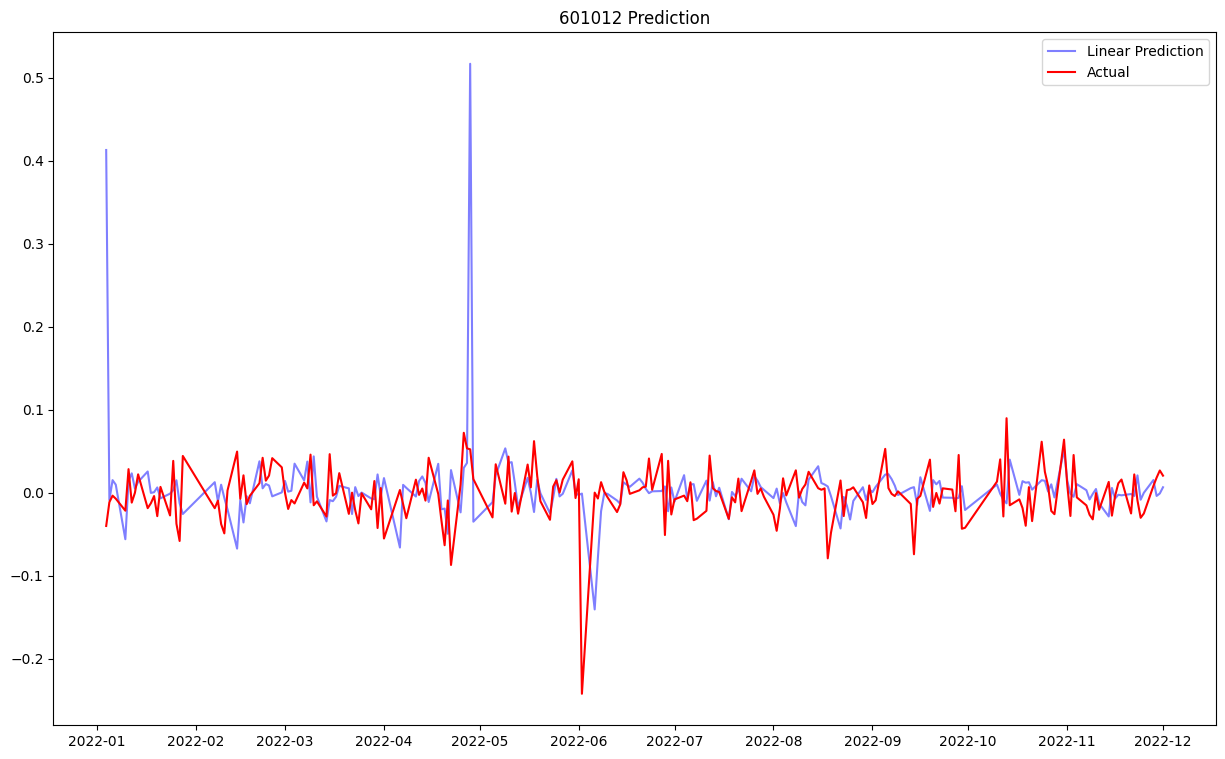

In [683]:
# Plotting the Actual and Prediction Prices

plt.figure(figsize=(15, 9))
plt.title(f"{code} Prediction")
plt.plot(df.index[display_at:], linear_model_predict_prediction, label='Linear Prediction', color='blue', alpha=0.5)
# plt.plot(predicted_dates, linear_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(df.index[display_at:], y_test, label='Actual', color='red')
plt.legend()
plt.savefig(f"price_plot/{code}LinearRegression.png")

## 2. Ridge Regression
Building Second model of regression - Ridge Regression

In [684]:
alpha_list = np.array([1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 20])

best alpha is  20.0
best score is  0.03841499420352245


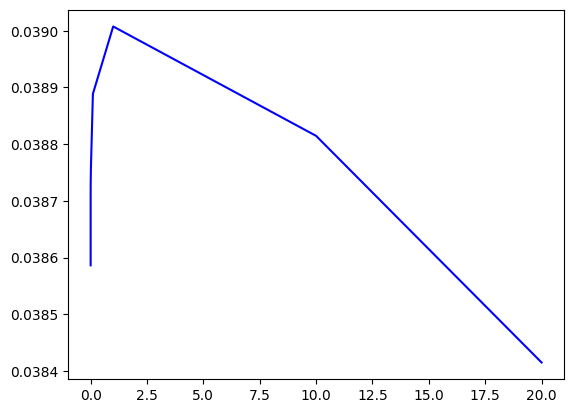

In [685]:
# Defining the Ridge Regression Model
val_scores = []
for alpha in alpha_list:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)     # Training the algorithm
    ridge_model_score = mean_absolute_error(y_val, ridge_model.predict(X_val))
    val_scores.append(ridge_model_score)

val_scores = np.array(val_scores)
min_index = np.argmin(val_scores)
best_alpha = alpha_list[min_index]
print('best alpha is ', best_alpha)
print('best score is ', val_scores[min_index])
plt.plot(alpha_list, val_scores, label='Validation Scores', color='blue')

In [686]:
# Score of the Ridge Regression Model (Using the Test Data)
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)
ridge_model_predict_prediction = ridge_model.predict(X_test)
ridge_rmse = mean_squared_error(y_test, ridge_model_predict_prediction, squared=False)
ridge_mae = mean_absolute_error(y_test, ridge_model_predict_prediction)
print(f'Ridge Model test RMSE: {ridge_rmse}, Ridge Model test MAE: {ridge_mae}')

Ridge Model test RMSE: 0.05589817711018087, Ridge Model test MAE: 0.03036559663850265


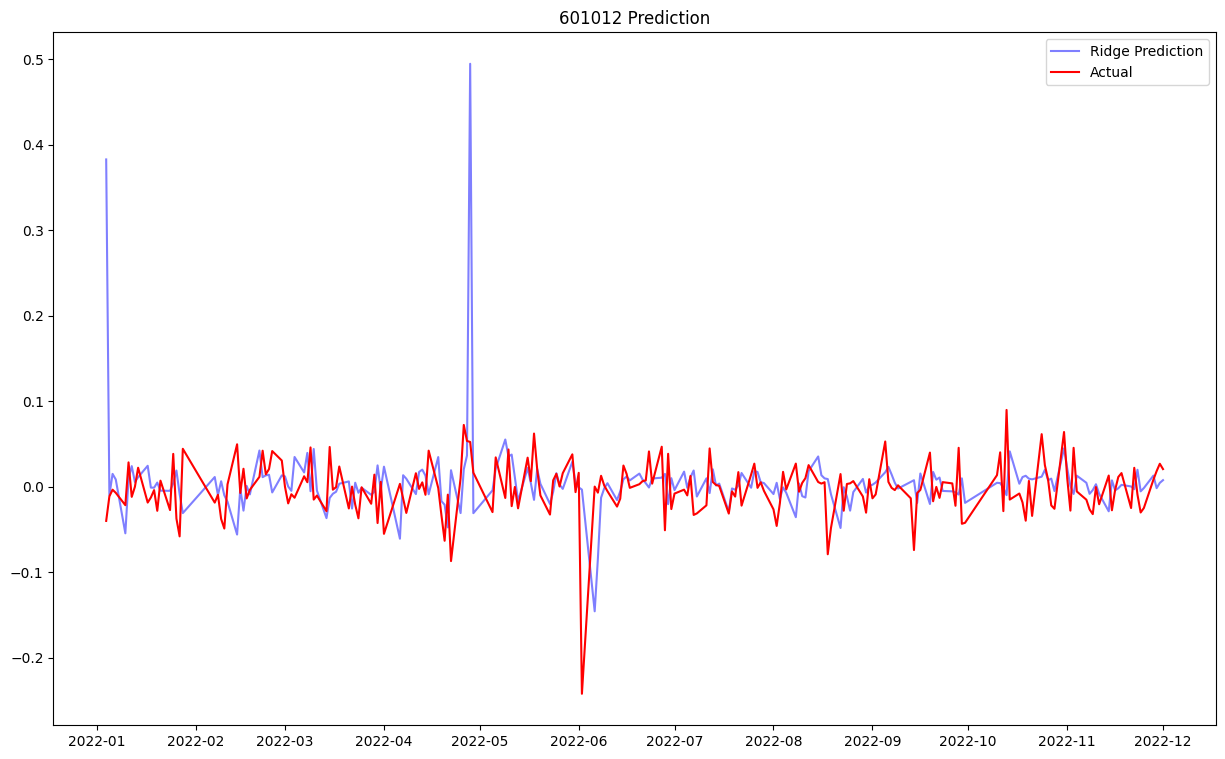

In [687]:
# Plotting the Actual and Prediction Prices

plt.figure(figsize=(15, 9))
plt.title(f"{code} Prediction")
plt.plot(df.index[display_at:], ridge_model_predict_prediction, label='Ridge Prediction', color='blue', alpha=0.5)
# plt.plot(predicted_dates, ridge_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(df.index[display_at:], df['收益率'][display_at:], label='Actual', color='red')
plt.legend()
plt.savefig(f"price_plot/{code}RidgeRegression.png")

In [688]:
df_ridge_prediction = pd.DataFrame(ridge_model_predict_prediction, index=df.index[display_at:], columns=['pred_return'])
df_ridge_prediction

,pred_return
Date,
2022-01-04,0.382648
2022-01-05,-0.009965
2022-01-06,0.015023
2022-01-07,0.008487
2022-01-10,-0.054469
...,...
2022-11-25,-0.001561
2022-11-28,0.013022
2022-11-29,-0.001666


In [689]:
df_pred_price = df_stockprice['实际值'] * (1 + df_ridge_prediction['pred_return'])
df_pred_price = df_pred_price.shift(axis=0, periods=1)
df_pred_price

Date
2022-01-04           NaN
2022-01-05    117.331522
2022-01-06     80.658154
2022-01-07     81.760092
2022-01-10     80.951266
                 ...    
2022-11-28     45.658611
2022-11-29     45.170651
2022-11-30     44.885082
2022-12-01     45.987515
2022-12-02     47.371735
Length: 222, dtype: float64

In [690]:
df_pred_price.to_csv(f"result_csv/{code}ridge.csv", header=False)

In [691]:
features = pd.DataFrame(ridge_model.coef_, index=df_X.columns, columns=['weights'])
features

,weights
ret_lag1,0.000345
ret_lag2,0.000366
ret_lag3,0.002522
ret_lag4,0.000566
ret_lag5,0.000523
...,...
宏观_固定资产投资完成额,-0.000598
宏观_社会消费品零售总额_diff1,-0.001373
宏观_M2_diff2,-0.000298
宏观_金融机构各项贷款余额_diff1,-0.000907


In [692]:
features = features[(features['weights'] > 0) | (features['weights'] < 0)]
features.sort_values(by='weights', ascending=False, inplace=True)
features.to_csv(f"features_importance/{code}ridgeFeatures.csv", header=False, encoding='utf_8_sig')

## 3. Lasso Regression
Building Third model of regression - Lasso Regression

best alpha is  0.01
best score is  0.0014625729691449358


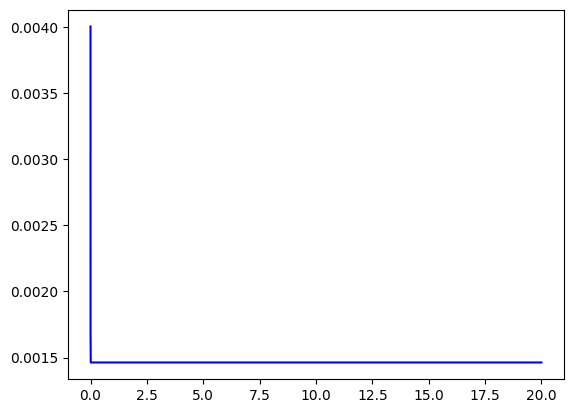

In [693]:
# Defining the Ridge Regression Model
val_scores = []
for alpha in alpha_list:
    lasso_model = Lasso(alpha=alpha, max_iter=100000)
    lasso_model.fit(X_train, y_train)     # Training the algorithm
    lasso_model_score = mean_squared_error(y_val, lasso_model.predict(X_val))
    val_scores.append(lasso_model_score)

val_scores = np.array(val_scores)
min_index = np.argmin(val_scores)
best_alpha = alpha_list[min_index]
print('best alpha is ', best_alpha)
print('best score is ', val_scores[min_index])
plt.plot(alpha_list, val_scores, label='Validation Scores', color='blue')

In [694]:
# Score of the Lasso Regression Model (Using the Test Data)
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train, y_train)
lasso_model_predict_prediction = lasso_model.predict(X_test)
lasso_rmse = mean_squared_error(y_test, lasso_model_predict_prediction, squared=False)
lasso_mae = mean_absolute_error(y_test, lasso_model_predict_prediction)
print(f'Lasso Model test RMSE: {lasso_rmse}, Lasso Model test MAE: {lasso_mae}')

Lasso Model test RMSE: 0.03230581316104993, Lasso Model test MAE: 0.022349279085223606


In [695]:
features = pd.DataFrame(lasso_model.coef_, index=df_X.columns, columns=['weights'])
features

,weights
ret_lag1,0.0
ret_lag2,0.0
ret_lag3,0.0
ret_lag4,0.0
ret_lag5,0.0
...,...
宏观_固定资产投资完成额,-0.0
宏观_社会消费品零售总额_diff1,-0.0
宏观_M2_diff2,-0.0
宏观_金融机构各项贷款余额_diff1,-0.0


In [696]:
features = features[(features['weights'] > 0) | (features['weights'] < 0)]
features.sort_values(by='weights', ascending=False)

,weights


In [697]:
features.to_csv(f"features_importance/{code}lassoFeatures.csv", header=False, encoding='utf_8_sig')

In [698]:
lasso_model_predict_prediction

array([0.00224264, 0.00224264, 0.00224264, 0.00224264, 0.00224264,
       0.00224264, 0.00224264, 0.00224264, 0.00224264, 0.00224264,
       0.00224264, 0.00224264, 0.00224264, 0.00224264, 0.00224264,
       0.00224264, 0.00224264, 0.00224264, 0.00224264, 0.00224264,
       0.00224264, 0.00224264, 0.00224264, 0.00224264, 0.00224264,
       0.00224264, 0.00224264, 0.00224264, 0.00224264, 0.00224264,
       0.00224264, 0.00224264, 0.00224264, 0.00224264, 0.00224264,
       0.00224264, 0.00224264, 0.00224264, 0.00224264, 0.00224264,
       0.00224264, 0.00224264, 0.00224264, 0.00224264, 0.00224264,
       0.00224264, 0.00224264, 0.00224264, 0.00224264, 0.00224264,
       0.00224264, 0.00224264, 0.00224264, 0.00224264, 0.00224264,
       0.00224264, 0.00224264, 0.00224264, 0.00224264, 0.00224264,
       0.00224264, 0.00224264, 0.00224264, 0.00224264, 0.00224264,
       0.00224264, 0.00224264, 0.00224264, 0.00224264, 0.00224264,
       0.00224264, 0.00224264, 0.00224264, 0.00224264, 0.00224

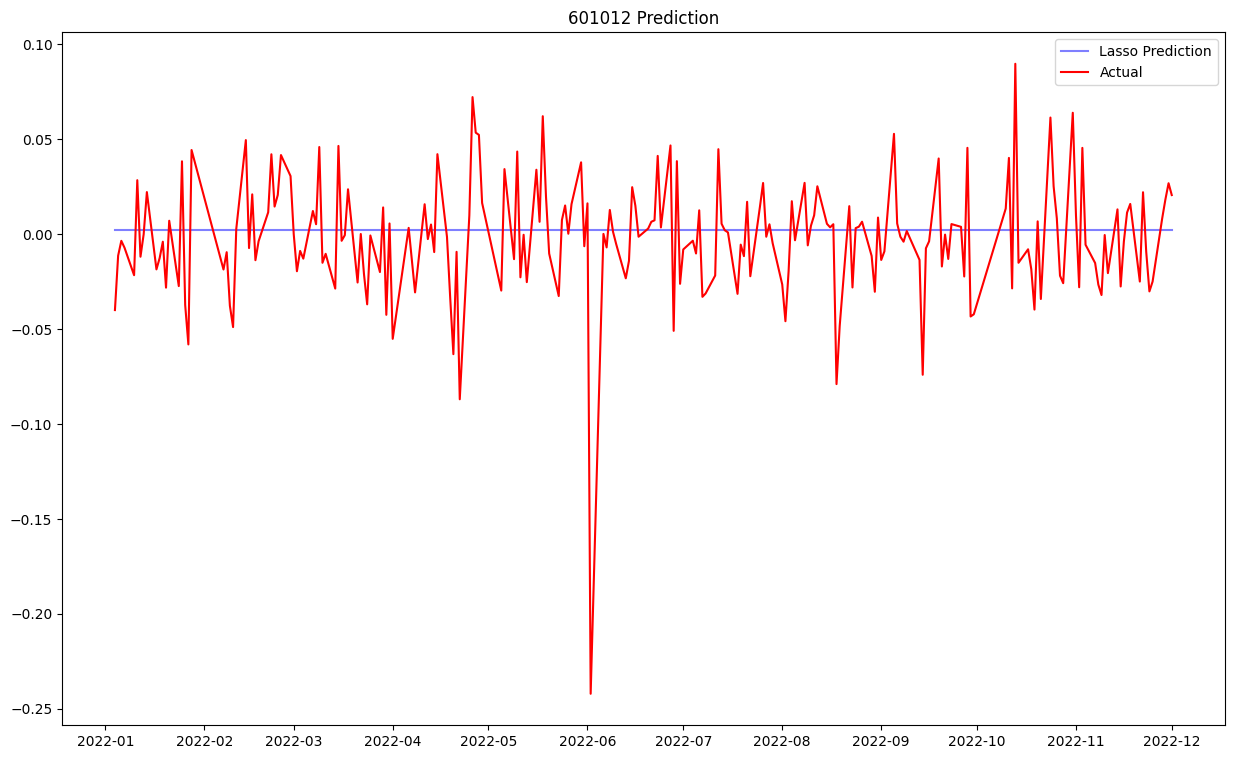

In [699]:
# Plotting the Actual and Prediction Prices

plt.figure(figsize=(15, 9))
plt.title(f"{code} Prediction")
plt.plot(df.index[display_at:], lasso_model_predict_prediction, label='Lasso Prediction', c='blue', alpha=0.5)
# plt.plot(predicted_dates, lasso_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(df.index[display_at:], df['收益率'][display_at:], label='Actual', color='red')
plt.legend()
plt.savefig(f"price_plot/{code}LassoRegression.png")

In [700]:
df_lasso_prediction = pd.DataFrame(lasso_model_predict_prediction, index=df.index[display_at:], columns=['pred_return'])
df_lasso_prediction

,pred_return
Date,
2022-01-04,0.002243
2022-01-05,0.002243
2022-01-06,0.002243
2022-01-07,0.002243
2022-01-10,0.002243
...,...
2022-11-25,0.002243
2022-11-28,0.002243
2022-11-29,0.002243


In [701]:
df_pred_price = df_stockprice['实际值'] * (1 + df_lasso_prediction['pred_return'])
df_pred_price = df_pred_price.shift(axis=0, periods=1)
df_pred_price

Date
2022-01-04          NaN
2022-01-05    85.050310
2022-01-06    81.652708
2022-01-07    80.730644
2022-01-10    80.450016
                ...    
2022-11-28    45.832556
2022-11-29    44.689999
2022-11-30    45.060829
2022-12-01    45.882668
2022-12-02    47.115426
Length: 222, dtype: float64

In [702]:
df_pred_price.to_csv(f"result_csv/{code}lasso.csv", header=False)